In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
precision = 9000

In [25]:
df_1 = pd.read_csv('../data/predictions/rf/rf_20220101_20220331.csv').eval('abs_diff = abs(soil_moisture - pred_soil_moisture)')


In [26]:
gdf_1 = (
    gpd.GeoDataFrame(
        df_1, geometry=gpd.points_from_xy(df_1.sp_lon, df_1.sp_lat)
    )
    .set_crs(4326)
    .to_crs(6933)  # Projection
)

In [27]:
gdf_1['x_round'] = (gdf_1.geometry.x / precision).round() * precision
gdf_1['y_round'] = (gdf_1.geometry.y / precision).round() * precision

In [38]:
gdf_grouped = (
        gdf_1
        .groupby(['x_round', 'y_round'])
        .agg(mean_target=('soil_moisture', 'mean'), mean_pred=('pred_soil_moisture', 'mean'), mean_abs_diff=('abs_diff', 'mean'), mean_cluster=('7', 'mean'), mean_vegetation_water_content=('vegetation_water_content', 'mean'), mean_reflectivity=('reflectivity', 'mean'), mean_sp_inc_angle=('sp_inc_angle', 'mean'), mean_peak_power=('peak_power', 'mean'))
    .reset_index()
)

In [39]:
gdf_grouped['x'] = gdf_grouped.x_round / precision
gdf_grouped['y'] = -gdf_grouped.y_round / precision

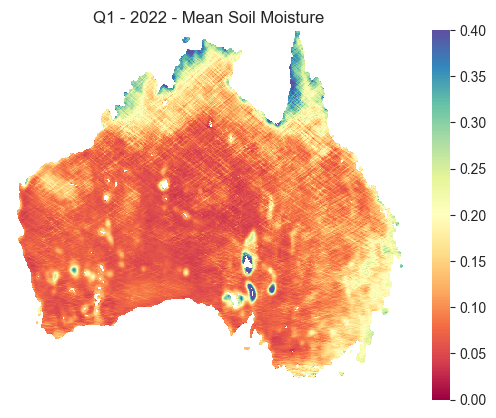

In [54]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_target']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Spectral', vmax=0.4, vmin=0)
ax.set_title('Q1 - 2022 - Mean Soil Moisture')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.axis('off')
plt.savefig('../figures/random_forest/maps/soil_moisture_2022Q1_mean.svg')

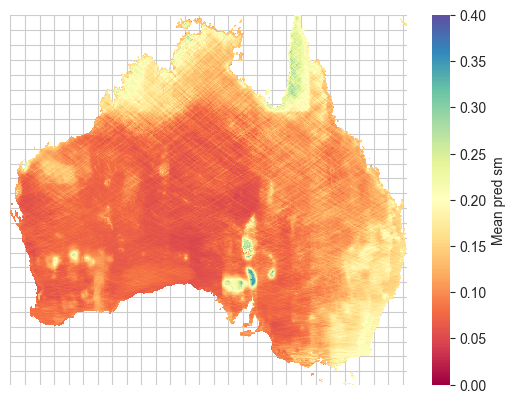

In [31]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_pred']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Spectral', vmax=0.4, vmin=0)
ax.set_title('Q1 - 2022 - Mean Predicted Soil Moisture')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('../figures/random_forest/maps/pred_soil_moisture_2022Q1_mean.svg')

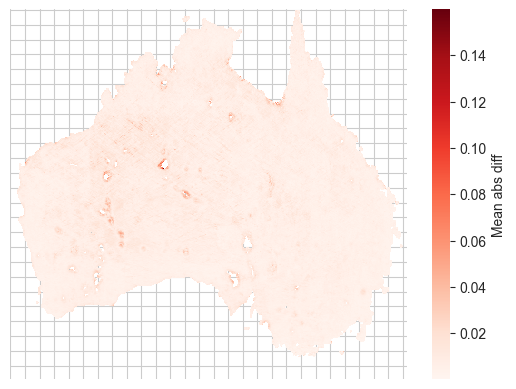

In [41]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_abs_diff']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Reds')
ax.set_title('Q1 - 2022 - Mean abs diff')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('../figures/random_forest/maps/abs_diff_2022Q1_mean.svg')

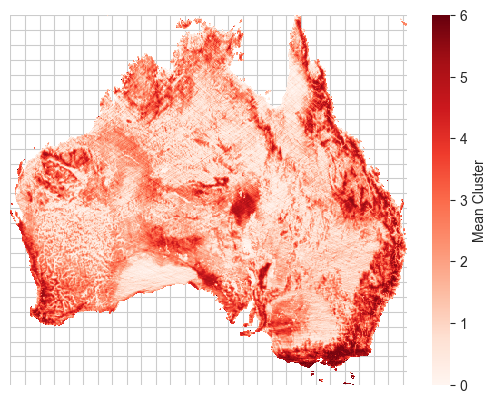

In [42]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_cluster']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Reds')
ax.set_title('Q1 - 2022 - Mean Cluster')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('../figures/random_forest/maps/mean_cluster_2022Q1_mean.svg')

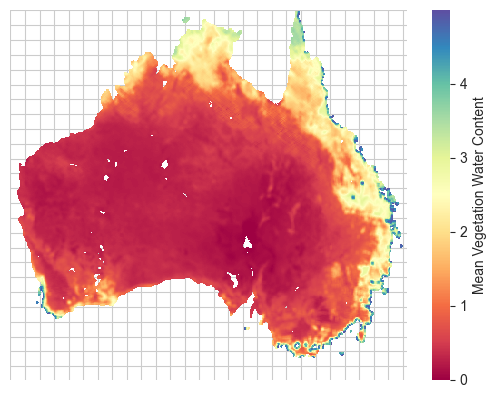

In [47]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_vegetation_water_content']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Spectral')
ax.set_title('Q1 - 2022 - Mean Vegetation Water Content')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('../figures/random_forest/maps/mean_vegetation_water_content_2022Q1_mean.svg')

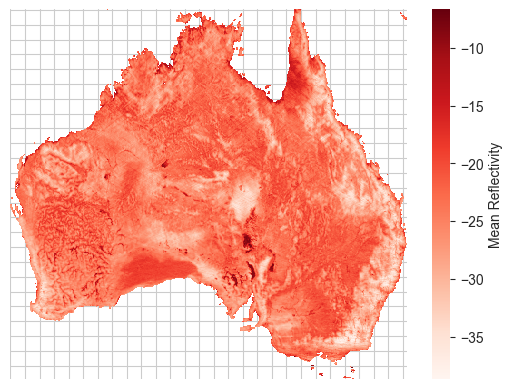

In [44]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_reflectivity']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Reds')
ax.set_title('Q1 - 2022 - Mean Reflectivity')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('../figures/random_forest/maps/mean_reflectivity_2022Q1_mean.svg')

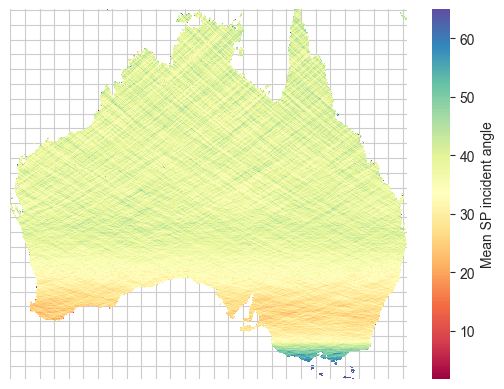

In [46]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_sp_inc_angle']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Spectral', cbar_kws={'label': 'Mean SP incident angle'})
ax.set_title('Q1 - 2022 - Mean Soil Moisture')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('../figures/random_forest/maps/mean_sp_inc_angle_2022Q1_mean.svg')

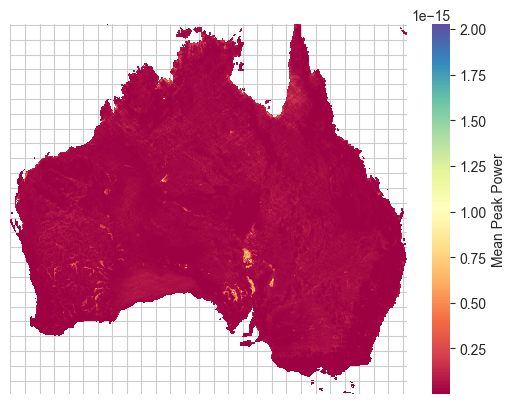

In [50]:
heatmap_data = pd.pivot(gdf_grouped.filter(['y', 'x', 'mean_peak_power']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Spectral')
ax.set_title('Q1 - 2022 - Mean Peak Power')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('../figures/random_forest/maps/mean_peak_power_2022Q1_mean.svg')

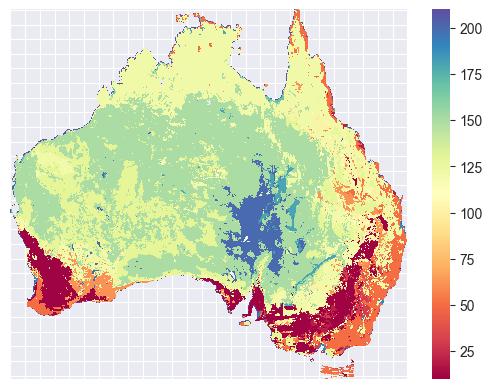

In [114]:
heatmap_data = pd.pivot(landcover_grouped.filter(['y', 'x', 'lccs_class']), columns='x', index='y')
ax = sns.heatmap(heatmap_data, cmap='Spectral')
ax.set(xlabel=None)
ax.set(ylabel=None)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
plt.savefig('figures/landcover_2021.svg')